In [1]:
import pandas as pd
import numpy as np

In [4]:
# Load dataset from the Desktop
df = pd.read_excel('/Users/audrey/Desktop/D598 Data Set.xlsx')

In [5]:
# Check for duplicates
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# If you want to remove them
df = df.drop_duplicates()

Number of duplicate rows: 0


In [7]:
# Group by 'Business State' and calculate descriptive statistics
grouped_df = df.groupby('Business State').agg({
    'Total Long-term Debt': ['mean', 'median', 'min', 'max'],
    'Total Equity': ['mean', 'median', 'min', 'max'],
    'Debt to Equity': ['mean', 'median', 'min', 'max'],
    'Total Liabilities': ['mean', 'median', 'min', 'max'],
    'Total Revenue': ['mean', 'median', 'min', 'max'],
    'Profit Margin': ['mean', 'median', 'min', 'max'],
})

# Save the grouped data to a new Excel file
grouped_df.to_excel('/Users/audrey/Desktop/grouped_statistics.xlsx')

In [8]:
# Filter businesses with negative debt-to-equity ratios
negative_debt_equity = df[df['Debt to Equity'] < 0]

# Save the filtered data to an Excel file
negative_debt_equity.to_excel('/Users/audrey/Desktop/negative_debt_equity.xlsx', index=False)

In [9]:
# Create a new column for debt-to-income ratio
df['Debt to Income Ratio'] = df['Total Long-term Debt'] / df['Total Revenue']

# Save this updated DataFrame with the new column
df.to_excel('/Users/audrey/Desktop/updated_with_debt_to_income.xlsx', index=False)

# Part C

/var/folders/yz/hpxxcq5s16gcl3n4cbkdb6ph0000gn/T/ipykernel_43947/3730450791.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Debt to Income Ratio', y='Business State', data=state_debt_income_avg, palette='viridis')


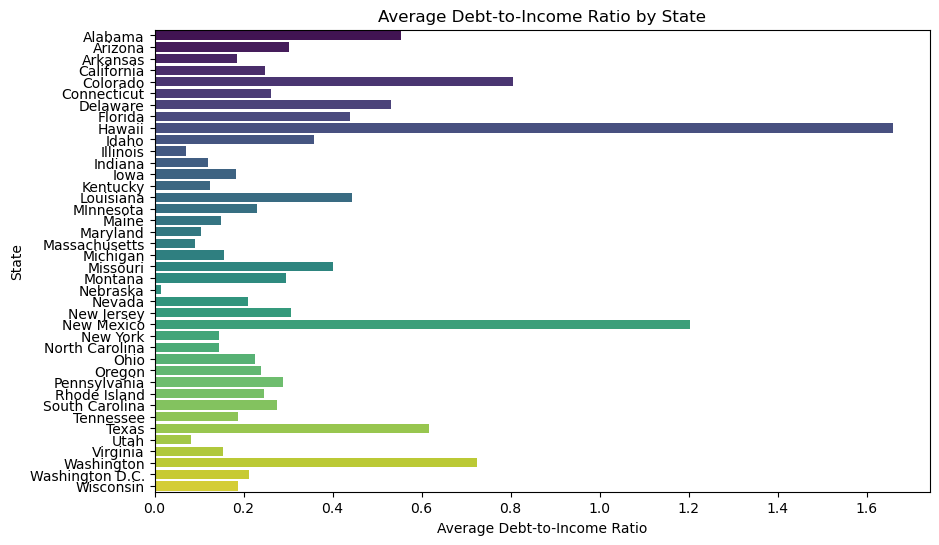

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by state and calculate average debt-to-income ratio
state_debt_income_avg = df.groupby('Business State')['Debt to Income Ratio'].mean().reset_index()

# Bar plot of average debt-to-income ratio by state
plt.figure(figsize=(10, 6))
sns.barplot(x='Debt to Income Ratio', y='Business State', data=state_debt_income_avg, palette='viridis')
plt.title('Average Debt-to-Income Ratio by State')
plt.xlabel('Average Debt-to-Income Ratio')
plt.ylabel('State')
plt.show()

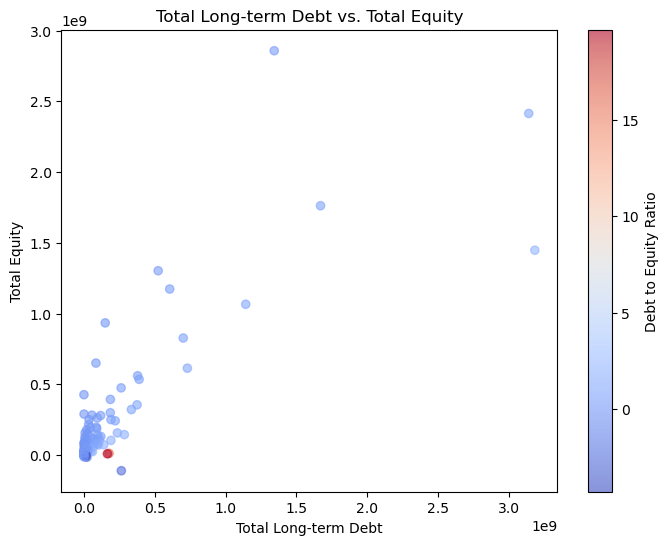

In [12]:
# Scatter plot of debt vs. equity colored by debt-to-equity ratio
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Total Long-term Debt'], df['Total Equity'], c=df['Debt to Equity'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Debt to Equity Ratio')
plt.title('Total Long-term Debt vs. Total Equity')
plt.xlabel('Total Long-term Debt')
plt.ylabel('Total Equity')
plt.show()

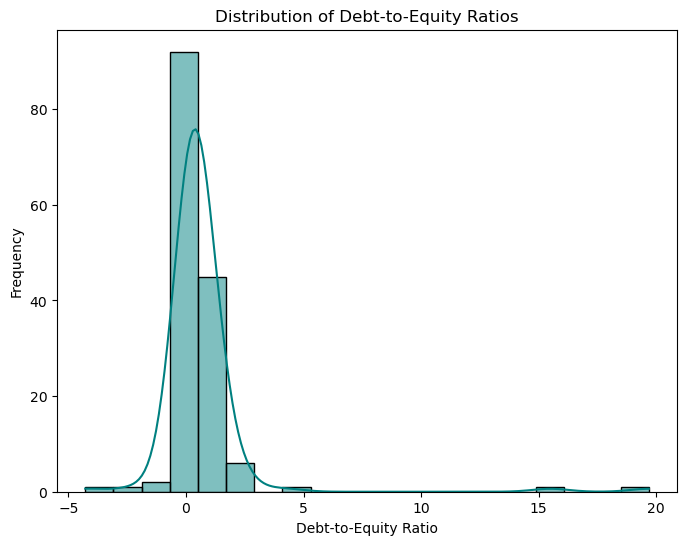

In [13]:
# Histogram of debt-to-equity ratios
plt.figure(figsize=(8, 6))
sns.histplot(df['Debt to Equity'], bins=20, color='teal', kde=True)
plt.title('Distribution of Debt-to-Equity Ratios')
plt.xlabel('Debt-to-Equity Ratio')
plt.ylabel('Frequency')
plt.show()

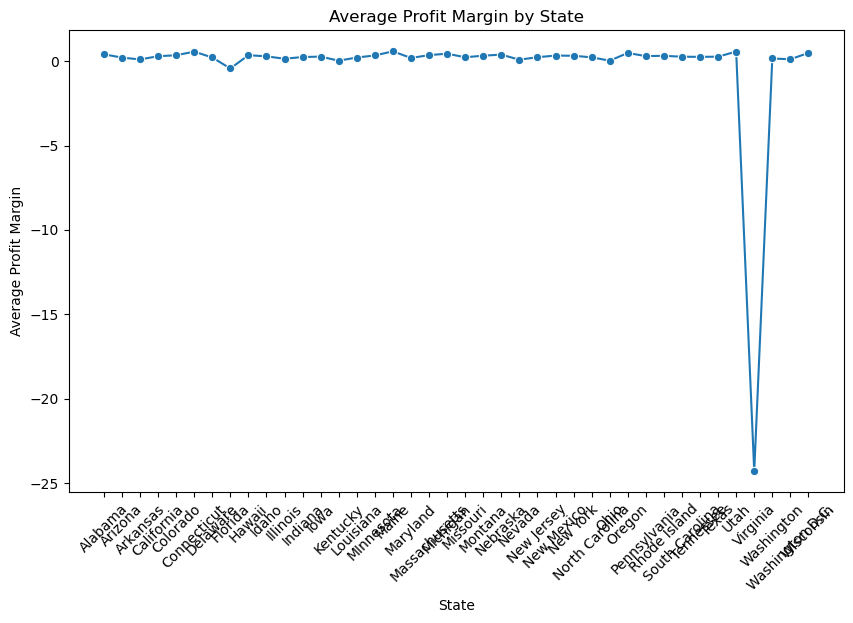

In [15]:
# Group by state and calculate average profit margin
state_profit_margin_avg = df.groupby('Business State')['Profit Margin'].mean().reset_index()

# Line plot of average profit margin by state
plt.figure(figsize=(10, 6))
sns.lineplot(x='Business State', y='Profit Margin', data=state_profit_margin_avg, marker='o')
plt.title('Average Profit Margin by State')
plt.xlabel('State')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45)
plt.show()